In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

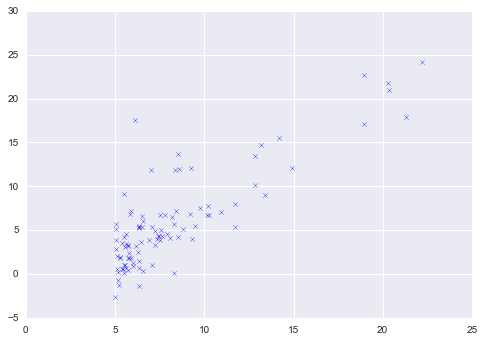

In [3]:
data = pd.read_csv('/Users/jschmolling/Dropbox/imi_master/4.semester/ml/machine-learning-ex1/ex1/ex1data1.txt',names=['x', 'y'])

x_train = np.stack([np.ones((len(data['x']))), data['x']],axis=1)
y_train = data['y']

plt.scatter(x_train[:,1], y_train,marker='x')

In [4]:
from theano import pp
from theano import function
import theano.tensor as T

In [5]:
x = T.dmatrix('x')
y = T.dvector('y')
theta = T.dvector('theta')
h = T.dot(x,theta)
J =  T.sum(T.pow(h - y,2)) / (2 * x.shape[0])
gJ = T.grad(J, theta)

print(pp(gJ))
cost = function([x, y, theta], J)
grad = function([x, y, theta], gJ)
H = function([x,theta], h)

f = function([x,theta], h)
cost(x_train, y_train, [0,0])

(x.T \dot ((fill((((x \dot theta) - y) ** TensorConstant{2}), (fill((Sum{acc_dtype=float64}((((x \dot theta) - y) ** TensorConstant{2})) / (TensorConstant{2} * Constant{0}[Shape(x)])), TensorConstant{1.0}) / (TensorConstant{2} * Constant{0}[Shape(x)]))) * TensorConstant{2}) * (((x \dot theta) - y) ** (TensorConstant{2} - TensorConstant{1}))))


array(32.072733877455654)

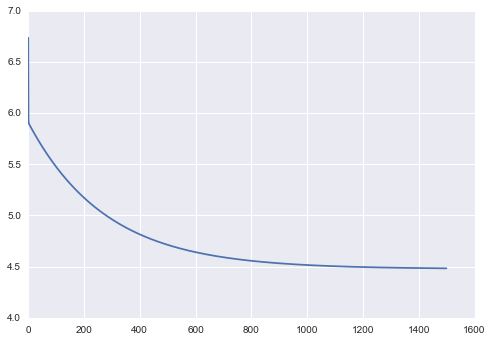

In [6]:
theta = [0, 0]
# print(cost(x_train, data['y'], theta))
rate = 0.01

hist = np.zeros(1500)
for i in range(1500):
    theta = theta - rate * grad(x_train, y_train, theta)
    hist[i] = cost(x_train, data['y'], theta)
#     print(theta)
plt.plot(hist)

(0, 25)

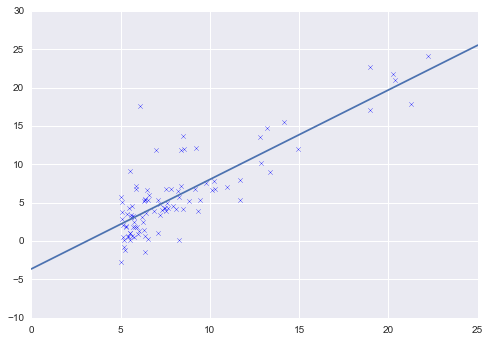

In [18]:
plt.scatter(data['x'], data['y'],marker='x')
line = np.linspace(0,25)
y = f( np.stack([np.ones(len(line)),line],axis=1),theta)
plt.plot(line,y)
plt.xlim(0, 25)

In [17]:
theta

array([-3.63029144,  1.16636235])

In [11]:
import tensorflow as tf

In [5]:
import mxnet as mx
import mxnet.symbol as S
import mxnet.ndarray as N

In [9]:
grad_arguments

{'theta': <mxnet.ndarray.NDArray at 0x7f91861cad30>}

In [7]:
x = S.Variable('x')
y = S.Variable('y')
m = S.Variable('m')
theta = S.Variable('theta')
h = S.dot(x, theta)
J = S.sum(S.pow(h - y, 2)) / (2 * m)
# gJ = T.grad(J, theta)

input_args = {}
input_args['x'] = mx.nd.array(x_train, ctx=mx.cpu())
input_args['y'] = mx.nd.array(np.transpose(np.array(y_train,ndmin=2)), ctx=mx.cpu()),
input_args['m'] = mx.nd.array([len(x_train)], ctx=mx.cpu()),
input_args['theta']=  mx.nd.array([[0], [0]], ctx=mx.cpu())

grad_arguments = { 'theta' : mx.nd.ones((2, ), ctx=mx.cpu())}
c_exec = J.bind(ctx=mx.cpu(), 
                args=input_args, 
                args_grad=grad_arguments)

TypeError: Only Accept list of NDArrays or dict of str to NDArray

In [ ]:
out_grad = mx.nd.ones((2,), ctx=mx.cpu())

c_exec.forward()
c_exec.backward(out_grad)
c_exec.outputs[0].asnumpy()
c_exec.grad_arrays

In [97]:
J.list_outputs()

['_div9_output']